In [1]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats

!whoami
!date

alibow
Tue Mar 31 12:54:54 PDT 2020


# 1. Exploring the output and doing spot-check validation on the intervention results

In [2]:
output_dirs = ['/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/ethiopia/2020_03_26_08_33_10/count_data/',
              '/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/india/2020_03_26_21_28_29/count_data/',
              '/ihme/costeffectiveness/results/vivarium_conic_lsff/v5.0_vitamin_a_fortification/nigeria/2020_03_24_23_27_55/count_data/']

locations = ['Ethiopia','India','Nigeria']

In [3]:
# View mortality rates for Ethiopia

index_columns = ['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[0] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[0] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
    # note: exclude folic_acid_fortification results here because I tested and 
    # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','vitamin_a_fortification_group','input_draw','age_group'], as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','vitamin_a_fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                         vitamin_a_fortification_group age_group               
baseline                         covered                       1_to_4            0.0   
                                                               early_neonatal   10.0   
                                                               late_neonatal    10.0   
                                                               post_neonatal    10.0   
                                 effectively_covered           1_to_4           15.0   
                                                               early_neonatal   15.0   
                                                               late_neonatal    15.0   
                                                               post_neonatal    15.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
vitamin_a_fortification_scale_up covered                       1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   

                                                                                        mean  \
scenario                         vitamin_a_fortification_group age_group                       
baseline                         covered                       1_to_4                    NaN   
                                                               early_neonatal  815774.016087   
                                                               late_neonatal   148473.206181   
                                                               post_neonatal    95282.235288   
                                 effectively_covered           1_to_4              45.230929   
                                                               early_neonatal       0.000000   
                                                               late_neonatal        0.000000   
                                                               post_neonatal      119.189057   
                                 uncovered                     1_to_4              76.706558   
                                                               early_neonatal   14498.512157   
                                                               late_neonatal     1321.121251   
                                                               post_neonatal      357.410666   
vitamin_a_fortification_scale_up covered                       1_to_4               0.000000   
                                                               early_neonatal  811096.091149   
                                                               late_neonatal   140152.876430   
                                                               post_neonatal    92783.522042   
                                 effectively_covered          

In [4]:
# do the same for india

index_columns = ['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[1] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[1] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
    # note: exclude folic_acid_fortification results here because I tested and 
    # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','vitamin_a_fortification_group','input_draw','age_group'], as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','vitamin_a_fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                         vitamin_a_fortification_group age_group               
baseline                         covered                       1_to_4            0.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
vitamin_a_fortification_scale_up covered                       1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   

                                                                                        mean  \
scenario                         vitamin_a_fortification_group age_group                       
baseline                         covered                       1_to_4                    NaN   
                                                               early_neonatal  994388.787947   
                                                               late_neonatal   182468.599583   
                                                               post_neonatal    94433.575277   
                                 effectively_covered           1_to_4              28.826940   
                                                               early_neonatal       0.000000   
                                                               late_neonatal        0.000000   
                                                               post_neonatal      127.671028   
                                 uncovered                     1_to_4              30.372966   
                                                               early_neonatal   16600.400574   
                                                               late_neonatal     1253.735164   
                                                               post_neonatal      250.905558   
vitamin_a_fortification_scale_up covered                       1_to_4               0.000000   
                                                               early_neonatal  996986.731069   
                                                               late_neonatal   178820.145065   
                                                               post_neonatal    93377.200661   
                                 effectively_covered          

In [5]:
# do the same for nigeria

index_columns = ['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

deaths = pd.read_hdf(output_dirs[2] + 'deaths.hdf')
deaths = deaths.drop(columns='measure').rename(columns={'value':'deaths'})
pt = pd.read_hdf(output_dirs[2] + 'person_time.hdf')
pt = pt.drop(columns='measure').rename(columns={'value':'person_time'})
data = deaths.merge(pt, left_on=index_columns, right_on=index_columns)
data = data.where(data['scenario'] != 'folic_acid_fortification_scale_up').dropna()
    # note: exclude folic_acid_fortification results here because I tested and 
    # they were identical to baseline results and are not relevant
data = data.groupby(['scenario','vitamin_a_fortification_group','input_draw','age_group'], as_index=False).sum()
data['death_rate'] = data['deaths'] / data['person_time'] * 100_000
    # note, some results will be NaN because might be dividing by person_time = 0
data = data.groupby(['scenario','vitamin_a_fortification_group','age_group']).describe()
data['death_rate']

count  \
scenario                         vitamin_a_fortification_group age_group               
baseline                         covered                       1_to_4            0.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
vitamin_a_fortification_scale_up covered                       1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 effectively_covered           1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   
                                 uncovered                     1_to_4           25.0   
                                                               early_neonatal   25.0   
                                                               late_neonatal    25.0   
                                                               post_neonatal    25.0   

                                                                                        mean  \
scenario                         vitamin_a_fortification_group age_group                       
baseline                         covered                       1_to_4                    NaN   
                                                               early_neonatal  773558.978890   
                                                               late_neonatal   101572.125137   
                                                               post_neonatal    94019.296751   
                                 effectively_covered           1_to_4             218.549101   
                                                               early_neonatal       0.000000   
                                                               late_neonatal        0.000000   
                                                               post_neonatal      328.213598   
                                 uncovered                     1_to_4             226.860017   
                                                               early_neonatal   20358.457882   
                                                               late_neonatal     1582.479090   
                                                               post_neonatal      630.397672   
vitamin_a_fortification_scale_up covered                       1_to_4               0.000000   
                                                               early_neonatal  735721.048283   
                                                               late_neonatal    97791.713655   
                                                               post_neonatal    82748.744027   
                                 effectively_covered          

## Conclusions from this exploration:

1. Mortality rates are too high in the "covered" group for all age groups (not relevant for 1 to 4 age-groups because they are >6 months old and therefore effectively covered).

2. For ETHIOPIA: The effect of the intervention (effectively covered versus uncovered groups) appears to be much stronger in the baseline scneario than the uncovered scenario. Is there something we are doing incorrectly here that is causing that? I would expect the "time to effect" period to cause the intervention to be slightly less effective than baseline coverage, but it seems to be a very significant difference for the 1-4 age group specifically. for NIGERIA, the opposite problem appears to be the case (mortality rate for uncovered/effetively covered in the vit_a_scale_up >> baseline for the 1-4 age group).

Maybe we implemented our baseline calibration incorrectly??? I think that this model was built before we had the documentation for how to do this in the concept model.

# 2. CALCULATING OUTCOMES AVERTED DUE TO VITAMIN A FORTIFICATION AND PLOT RESULTS

In [6]:
index_cols = ['year', 'age_group', 'sex', 'cause', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario']

In [7]:
# load and merge stratified count results for each location, outcome
master_counts = pd.DataFrame()
master_rates = pd.DataFrame()
for i in range(len(output_dirs)):
    yll_count = pd.read_hdf(output_dirs[i] + 'ylls.hdf').rename(columns={'value':'ylls'}).drop(columns='measure')
    yld_count = pd.read_hdf(output_dirs[i] + 'ylds.hdf').rename(columns={'value':'ylds'}).drop(columns='measure')
    daly_count = yll_count.merge(yld_count, right_on=index_cols, left_on=index_cols)
    daly_count['dalys'] = daly_count['ylls'] + daly_count['ylds']
    deaths = pd.read_hdf(output_dirs[i] + 'deaths.hdf').rename(columns={'value':'deaths'}).drop(columns='measure')
    data = daly_count.merge(deaths, right_on=index_cols, left_on=index_cols)
    person_time = pd.read_hdf(output_dirs[i] + 'person_time.hdf').rename(columns={'value':'person_time'}).drop(columns='measure')
    counts = data.merge(person_time, right_on=['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario'], 
                     left_on=['year', 'age_group', 'sex', 'folic_acid_fortification_group',
       'vitamin_a_fortification_group', 'input_draw', 'scenario'])
    counts['location'] = locations[i]
    master_counts = master_counts.append(counts)
master_counts.head()

,year,age_group,sex,cause,folic_acid_fortification_group,vitamin_a_fortification_group,input_draw,scenario,ylls,ylds,dalys,deaths,person_time,location
0,2020,1_to_4,female,diarrheal_diseases,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
1,2020,1_to_4,female,lower_respiratory_infections,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
2,2020,1_to_4,female,measles,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
3,2020,1_to_4,female,neural_tube_defects,covered,covered,21,baseline,0.0,0.0,0.0,0.0,0.0,Ethiopia
4,2020,1_to_4,female,diarrheal_diseases,covered,covered,21,folic_acid_fortification_scale_up,0.0,0.0,0.0,0.0,0.0,Ethiopia


In [8]:
# define function to calculate averted outcomes (dalys, ylds, ylls, deaths) in rate space
# by specified stratifying variables

def get_stratified_averted_results(strata_cols):  
    overall = master_counts.groupby((['location','scenario','input_draw']+strata_cols), as_index=False).sum()
    overall_baseline = (overall.where(overall['scenario'] == 'baseline').dropna()
                        .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    overall_intervention = (overall.where(overall['scenario'] == 'vitamin_a_fortification_scale_up').dropna()
                            .set_index((['location','input_draw']+strata_cols)).drop(columns='scenario'))
    merged = overall_baseline.merge(overall_intervention, right_on=(['location','input_draw']+strata_cols),
                                    left_on=(['location','input_draw']+strata_cols), 
                                    suffixes=('_baseline','_intervention'))
    # drop rows where there is zero person time in either the baseline or intervention
        # note... I believe this biases results towards baseline coverage >> 0, but more thorough investigation into
        # impact of this should be conducted
    merged = merged.where(merged['person_time_intervention'] != 0).where(merged['person_time_baseline'] != 0).dropna()
    for measure in ['ylls','ylds','dalys','deaths']:
        merged[f'{measure}'] = merged[f'{measure}_baseline'] - merged[f'{measure}_intervention'] 
    merged = (merged.reset_index().groupby((['location']+strata_cols))
                       .describe(percentiles=[0.025,0.975,0.25,0.75]))
    # divide by number of years so that results are per 100,000 person years
    if 'year' not in strata_cols:
        merged = merged / len(np.unique(master_counts['year']))
    return merged

In [9]:
# Calculate overall (unstratified results):
overall_results = get_stratified_averted_results([])
overall_results['dalys']

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
location,,,,,,,,,,
Ethiopia,5.0,3975.429824,2628.580040,-2557.479368,-1851.242673,2842.252351,4690.133446,5728.654607,7167.553011,7178.339215
India,5.0,2888.059860,1178.104637,815.007007,886.899139,2013.895594,3064.973690,3755.165434,4543.651380,4934.462653
Nigeria,5.0,3899.520745,1700.325394,293.805972,750.148206,3096.937354,3534.608069,5035.866410,7002.971396,7220.533131


In [10]:
# Calculate overall (unstratified results):
averted_by_age = get_stratified_averted_results(['age_group'])
averted_by_age = averted_by_age.reset_index()
averted_by_age = averted_by_age.where(averted_by_age['age_group'] == '1_to_4').set_index(['location','age_group']).dropna()
averted_by_age['dalys']

# compare to back of envelope calculation... results are fairly similar
# Ethiopia: 1167
# India: 578
# Nigeria: 3025

,,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
location,age_group,,,,,,,,,,
Ethiopia,1_to_4,5.0,2178.644662,1471.577466,-1376.845754,-999.401858,1383.040773,2390.983375,3309.535851,3885.364791,3895.955797
India,1_to_4,5.0,1090.687306,485.710246,322.640459,322.925765,764.348947,1064.122839,1606.019431,1781.927913,1805.780742
Nigeria,1_to_4,5.0,2739.214005,1206.860676,188.845317,560.896245,2200.090657,2550.592377,3534.007099,4989.200501,5054.797026


In [11]:
# Calculate overall (unstratified results):
averted_by_age_and_year = get_stratified_averted_results(['age_group','year'])
averted_by_age_and_year = averted_by_age_and_year.reset_index()
averted_by_age_and_year = (averted_by_age_and_year
                  .where(averted_by_age_and_year['year'] == '2024').dropna())
averted_by_age_and_year = averted_by_age_and_year.set_index(['location','age_group','year'])
averted_by_age_and_year['dalys']

count          mean           std           min  \
location age_group      year                                                    
Ethiopia 1_to_4         2024   25.0  2.641163e+03  1.736480e+03 -1.419419e+03   
         early_neonatal 2024   25.0  5.456968e-14  4.835813e-13 -9.094947e-13   
         late_neonatal  2024   25.0  2.910383e-13  9.083571e-13 -2.728484e-12   
         post_neonatal  2024   25.0  2.168776e+03  1.402218e+03 -1.322688e+03   
India    1_to_4         2024   25.0  1.127112e+03  6.334501e+02  1.869372e+02   
         early_neonatal 2024   25.0 -1.364242e-14  4.181245e-13 -9.094947e-13   
         late_neonatal  2024   25.0  7.275958e-14  8.164372e-13 -2.273737e-12   
         post_neonatal  2024   25.0  2.056820e+03  9.210523e+02  3.539920e+02   
Nigeria  1_to_4         2024   25.0  4.267927e+03  1.793600e+03  1.737788e+02   
         early_neonatal 2024   25.0 -8.185452e-14  3.527347e-13 -9.094947e-13   
         late_neonatal  2024   25.0  5.456968e-14  9.125213e-13 -9.094947e-13   
         post_neonatal  2024   25.0  1.820487e+03  9.020869e+02  2.619458e+02   

                                      2.5%           25%           50%  \
location age_group      year                                             
Ethiopia 1_to_4         2024 -8.333548e+02  1.846660e+03  3.227561e+03   
         early_neonatal 2024 -6.366463e-13 -2.273737e-13  0.000000e+00   
         late_neonatal  2024 -1.637090e-12  0.000000e+00  4.547474e-13   
         post_neonatal  2024 -1.003272e+03  2.022983e+03  2.455717e+03   
India    1_to_4         2024  1.884927e+02  6.135711e+02  1.069673e+03   
         early_neonatal 2024 -6.366463e-13 -2.273737e-13  0.000000e+00   
         late_neonatal  2024 -2.000888e-12 -4.547474e-13  0.000000e+00   
         post_neonatal  2024  4.579514e+02  1.237336e+03  2.363420e+03   
Nigeria  1_to_4         2024  1.101352e+03  3.091032e+03  4.062587e+03   
         early_neonatal 2024 -6.366463e-13 -4.547474e-13  0.000000e+00   
         late_neonatal  2024 -9.094947e-13 -9.094947e-13  0.000000e+00   
         post_neonatal  2024  2.629356e+02  1.226985e+03  1.845433e+03   

                                       75%         97.5%           max  
location age_group      year                                            
Ethiopia 1_to_4         2024  3.998893e+03  4.935468e+03  5.715247e+03  
         early_neonatal 2024  4.547474e-13  9.094947e-13  9.094947e-13  
         late_neonatal  2024  9.094947e-13  1.273293e-12  1.818989e-12  
         post_neonatal  2024  3.184565e+03  4.048021e+03  4.060534e+03  
India    1_to_4         2024  1.598830e+03  2.390299e+03  2.572673e+03  
         early_neonatal 2024  2.273737e-13  9.094947e-13  9.094947e-13  
         late_neonatal  2024  4.547474e-13  1.091394e-12  1.364242e-12  
         post_neonatal  2024  2.636268e+03  3.548486e+03  4.125746e+03  
Nigeria  1_to_4         2024  5.256485e+03  7.603973e+03  7.796764e+03  
         early_neonatal 2024  0.000000e+00  4.547474e-13  4.547474e-13  
         late_neonatal  2024  9.094947e-13  1.818989e-12  1.818989e-12  
         post_neonatal  2024  2.368554e+03  3.174215e+03  3.325497e+03

In [12]:
averted_by_coverage = get_stratified_averted_results(['vitamin_a_fortification_group'])
averted_by_coverage['deaths']

# NOTE: results here do not make sense...
    # we would expect to see ~0 averted deaths in the uncovered and covered groups and 
    # POSITIVE dalys averted in the effectively_covered groups
    
# also, note... there are only 10 input draws for "the covered" scenario here because some 
# draws had person_time=0... these were excluded (this will not be an issue for the outputs where
# we do not stratify by vitamin_a_fortification_group)

count     mean        std    min  \
location vitamin_a_fortification_group                                     
Ethiopia covered                          2.0 -151.180  28.852029 -182.8   
         effectively_covered              3.0 -338.800  76.149852 -507.8   
         uncovered                        5.0  556.736  87.819658  267.2   
India    covered                          5.0 -152.608  11.245366 -176.6   
         effectively_covered              5.0 -215.856  20.993374 -259.6   
         uncovered                        5.0  401.176  24.056206  353.6   
Nigeria  covered                          5.0 -167.928  18.133016 -204.6   
         effectively_covered              5.0 -471.360  48.719435 -559.4   
         uncovered                        5.0  684.320  62.536976  588.8   

                                           2.5%     25%    50%    75%  \
location vitamin_a_fortification_group                                  
Ethiopia covered                       -180.325 -160.95 -155.2 -151.5   
         effectively_covered           -467.690 -376.20 -335.6 -309.4   
         uncovered                      388.760  523.40  561.0  602.8   
India    covered                       -170.960 -160.40 -151.8 -146.6   
         effectively_covered           -251.920 -232.00 -214.0 -200.0   
         uncovered                      361.520  383.60  407.6  411.2   
Nigeria  covered                       -198.720 -182.00 -169.4 -151.8   
         effectively_covered           -546.800 -515.00 -475.6 -433.0   
         uncovered                      592.400  624.40  693.0  718.6   

                                          97.5%    max  
location vitamin_a_fortification_group                  
Ethiopia covered                        -91.225  -74.8  
         effectively_covered           -193.880 -160.0  
         uncovered                      717.000  731.4  
India    covered                       -131.320 -130.6  
         effectively_covered           -180.240 -176.4  
         uncovered                      442.240  458.2  
Nigeria  covered                       -143.040 -141.0  
         effectively_covered           -387.400 -383.8  
         uncovered                      790.280  813.2

In [13]:
averted_by_coverage_and_age = get_stratified_averted_results(['vitamin_a_fortification_group','age_group'])
averted_by_coverage_and_age['deaths']

count        mean  \
location vitamin_a_fortification_group age_group                           
Ethiopia covered                       early_neonatal    2.0   -9.960000   
                                       late_neonatal     2.0  -20.620000   
                                       post_neonatal     2.0 -120.600000   
         effectively_covered           1_to_4            3.0 -205.613333   
                                       early_neonatal    3.0    0.000000   
                                       late_neonatal     3.0    0.000000   
                                       post_neonatal     3.0 -133.186667   
         uncovered                     1_to_4            5.0  234.888000   
                                       early_neonatal    5.0   10.576000   
                                       late_neonatal     5.0   22.848000   
                                       post_neonatal     5.0  288.424000   
India    covered                       early_neonatal    5.0  -12.944000   
                                       late_neonatal     5.0  -23.904000   
                                       post_neonatal     5.0 -115.760000   
         effectively_covered           1_to_4            5.0  -97.112000   
                                       early_neonatal    5.0    0.000000   
                                       late_neonatal     5.0    0.000000   
                                       post_neonatal     5.0 -118.744000   
         uncovered                     1_to_4            5.0  109.376000   
                                       early_neonatal    5.0   12.944000   
                                       late_neonatal     5.0   23.904000   
                                       post_neonatal     5.0  254.952000   
Nigeria  covered                       early_neonatal    5.0   -8.968000   
                                       late_neonatal     5.0  -16.544000   
                                       post_neonatal     5.0 -142.416000   
         effectively_covered           1_to_4            5.0 -311.640000   
                                       early_neonatal    5.0    0.000000   
                                       late_neonatal     5.0    0.000000   
                                       post_neonatal     5.0 -159.720000   
         uncovered                     1_to_4            5.0  343.440000   
                                       early_neonatal    5.0    8.968000   
                                       late_neonatal     5.0   16.544000   
                                       post_neonatal     5.0  315.368000   

                                                             std    min  \
location vitamin_a_fortification_group age_group                          
Ethiopia covered                       early_neonatal   2.449127  -12.8   
                                       late_neonatal    3.192282  -23.8   
                                       post_neonatal   24.117859 -146.4   
         effectively_covered           1_to_4          44.147575 -299.6   
                                       early_neonatal   0.000000    0.0   
                                       late_neonatal    0.000000    0.0   
                                       post_neonatal   32.980034 -208.2   
         uncovered                     1_to_4          39.996253  118.6   
                                       early_neonatal   2.710670    4.6   
                                       late_neonatal    3.514864   12.8   
                                       post_neonatal   47.185284  131.2   
India    covered                       early_neonatal   2.687328  -20.6   
                                       late_neonatal    3.043638  -32.0   
                                       post_neonatal    9.875222 -137.4   
         effectively_covered           1_to_4          13.836435 -127.4   
                                       early_neonatal   0.000000    0.0   
                                       late_

In [14]:
averted_by_year = get_stratified_averted_results(['year'])
averted_by_year['dalys']

# these results also do not make sense because averted deaths should be ~0 in 2020?

count         mean          std          min         2.5%  \
location year                                                              
Ethiopia 2020   25.0  2057.563672  1477.819639 -1404.412155  -982.770041   
         2021   25.0  4190.510616  2957.705647 -2988.753266 -2384.505565   
         2022   25.0  4340.335275  2925.561088 -3256.165677 -2096.706168   
         2023   25.0  4478.801083  3074.651724 -2395.958426 -1955.604282   
         2024   25.0  4809.938478  3029.454973 -2742.107317 -1836.627311   
India    2020   25.0  1544.075657   641.683430   185.763087   341.191938   
         2021   25.0  3209.440964  1347.475797   714.227014   920.433956   
         2022   25.0  3259.169439  1267.814266   977.490624  1028.702947   
         2023   25.0  3243.680867  1438.484428   883.063604   931.692895   
         2024   25.0  3183.932372  1478.496281   540.929239   745.519796   
Nigeria  2020   25.0  1369.535789   801.723491   170.762153   223.804031   
         2021   25.0  2938.476037  1284.944837   344.434764   551.442092   
         2022   25.0  3862.823091  1816.205733   173.328912   642.757171   
         2023   25.0  5238.355453  2462.701585   344.779416   968.450199   
         2024   25.0  6088.413358  2539.890586   435.724612  1364.287535   

                       25%          50%          75%         97.5%  \
location year                                                        
Ethiopia 2020  1414.653868  2374.264850  2846.298201   4379.485779   
         2021  2783.277584  4844.084567  6380.957768   8042.792960   
         2022  2643.570923  5124.484060  6279.334802   8324.262408   
         2023  2722.466458  5030.764969  6402.295661   8963.793057   
         2024  3545.159511  5777.306501  6842.449890   8234.472792   
India    2020  1231.557103  1687.094591  2045.126468   2460.643777   
         2021  2381.433085  3438.033912  4249.886568   5110.655685   
         2022  2464.886165  3458.774217  4404.679732   4991.682888   
         2023  2462.188609  3231.621765  4155.462795   5584.207366   
         2024  2218.708157  3594.655823  4253.463682   5487.556838   
Nigeria  2020   860.958332  1136.910273  2159.749844   2816.724106   
         2021  2076.168722  2784.215109  3735.558230   5218.033517   
         2022  2687.233215  3558.767994  5224.450576   7337.780551   
         2023  4307.499421  5041.241374  6252.143067   9993.712809   
         2024  4579.120119  6049.304968  7623.475100  10824.516756   

                        max  
location year                
Ethiopia 2020   4439.825821  
         2021   8458.772449  
         2022   8525.869734  
         2023   9321.029577  
         2024   8308.521444  
India    2020   2476.999971  
         2021   5385.282526  
         2022   5272.276743  
         2023   5874.258039  
         2024   6698.418679  
Nigeria  2020   3027.953798  
         2021   6126.845429  
         2022   7489.653309  
         2023  10073.489479  
         2024  10859.875850

In [15]:
def make_plots_by_year_no_uncertainty(dataset, outcome_var):
    
    if outcome_var == 'dalys':
        outcome_name_long = 'Disability Adjusted Life Years'
        outcome_name_short = 'DALYs'
    elif outcome_var == 'ylls':
        outcome_name_long = 'Years of Life Lost'
        outcome_name_short = 'YLLs'
    elif outcome_var == 'ylds':
        outcome_name_long = 'Years Lived with Disability'
        outcome_name_short = 'YLDs'
    else:
        outcome_name_long = 'Deaths'
        outcome_name_short = 'Deaths'

    data = pd.DataFrame.copy(dataset).reset_index()
    ethiopia = data.where(data['location'] == 'Ethiopia').dropna()
    india = data.where(data['location'] == 'India').dropna()
    nigeria = data.where(data['location'] == 'Nigeria').dropna()

    plt.scatter(ethiopia['year'], ethiopia[outcome_var,'mean'])
    plt.plot(ethiopia['year'], ethiopia[outcome_var,'mean'])

    plt.scatter(india['year'], india[outcome_var,'mean'])
    plt.plot(india['year'], india[outcome_var,'mean'])

    plt.scatter(nigeria['year'], nigeria[outcome_var,'mean'])
    plt.plot(nigeria['year'], nigeria[outcome_var,'mean'])

    plt.title(f'{outcome_name_long} ({outcome_name_short}) Averted per 100,000 Person-Years')
    plt.legend(['Ethiopia','India','Nigeria'])
    plt.ylabel(f'{outcome_name_short} Averted per 100,000 PY')
    #plt.savefig('ethiopia_and_nigeria_by_year.png')

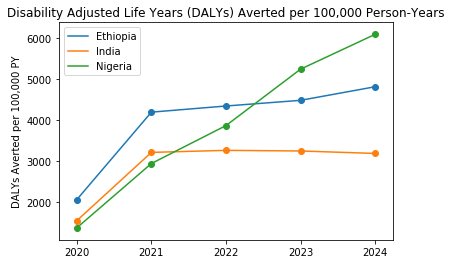

In [16]:
make_plots_by_year_no_uncertainty(averted_by_year,'dalys')

# India results should not *decrease* overtime after 2021?
# Also, plots should start at zero at 2020?

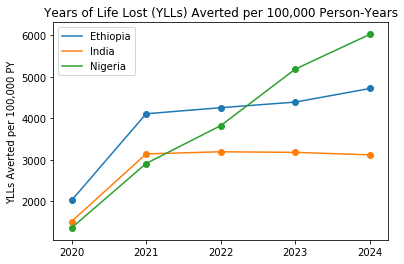

In [17]:
make_plots_by_year_no_uncertainty(averted_by_year,'ylls')

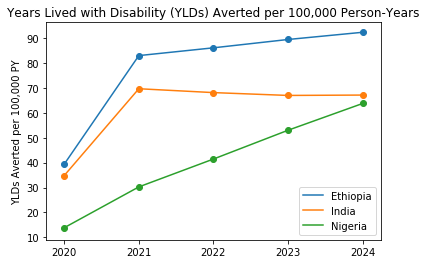

In [18]:
make_plots_by_year_no_uncertainty(averted_by_year,'ylds')

In [19]:
def make_plots_by_year_with_uncertainty(dataset, outcome_var):
    
    if outcome_var == 'dalys':
        outcome_name_long = 'Disability Adjusted Life Years'
        outcome_name_short = 'DALYs'
    elif outcome_var == 'ylls':
        outcome_name_long = 'Years of Life Lost'
        outcome_name_short = 'YLLs'
    elif outcome_var == 'ylds':
        outcome_name_long = 'Years Lived with Disability'
        outcome_name_short = 'YLDs'
    else:
        outcome_name_long = 'Deaths'
        outcome_name_short = 'Deaths'

    data = pd.DataFrame.copy(dataset).reset_index()
    ethiopia = data.where(data['location'] == 'Ethiopia').dropna()
    india = data.where(data['location'] == 'India').dropna()
    nigeria = data.where(data['location'] == 'Nigeria').dropna()

    plt.scatter(ethiopia['year'], ethiopia[outcome_var,'mean'])
    plt.plot(ethiopia['year'], ethiopia[outcome_var,'mean'])

    plt.scatter(india['year'], india[outcome_var,'mean'])
    plt.plot(india['year'], india[outcome_var,'mean'])

    plt.scatter(nigeria['year'], nigeria[outcome_var,'mean'])
    plt.plot(nigeria['year'], nigeria[outcome_var,'mean'])
    
    plt.plot(ethiopia['year'],ethiopia['dalys','min'],linestyle='dashed',c='tab:blue')
    plt.plot(ethiopia['year'],ethiopia['dalys','max'],linestyle='dashed',c='tab:blue')

    plt.plot(india['year'],india['dalys','min'],linestyle='dashed',c='tab:orange')
    plt.plot(india['year'],india['dalys','max'],linestyle='dashed',c='tab:orange')

    plt.plot(nigeria['year'],nigeria['dalys','min'],linestyle='dashed',c='tab:green')
    plt.plot(nigeria['year'],nigeria['dalys','max'],linestyle='dashed',c='tab:green')

    plt.title(f'{outcome_name_long} ({outcome_name_short}) Averted per 100,000 Person-Years')
    plt.legend(['Ethiopia','India','Nigeria'])
    plt.ylabel(f'{outcome_name_short} Averted per 100,000 PY')
    #plt.savefig('ethiopia_and_nigeria_by_year.png')

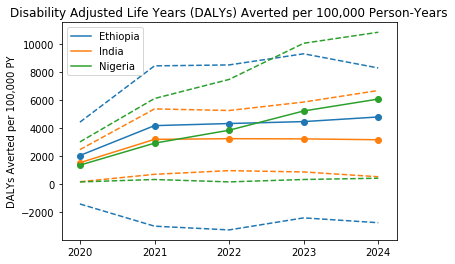

In [20]:
make_plots_by_year_with_uncertainty(averted_by_year,'dalys')

In [21]:
overall_results.head()

input_draw                                                           \
              count    mean        std  min  2.5%   25%   50%    75%   97.5%   
location                                                                       
Ethiopia        5.0  87.504  52.025094  4.2  5.16  46.4  96.4  125.8  175.16   
India           5.0  87.504  52.025094  4.2  5.16  46.4  96.4  125.8  175.16   
Nigeria         5.0  87.504  52.025094  4.2  5.16  46.4  96.4  125.8  175.16   

                 ... deaths                                                    \
            max  ...  count    mean        std   min   2.5%   25%   50%   75%   
location         ...                                                            
Ethiopia  189.2  ...    5.0  45.280  29.940107 -29.0 -21.08  32.4  53.2  65.2   
India     189.2  ...    5.0  32.712  13.358403   9.2  10.04  22.6  34.8  42.4   
Nigeria   189.2  ...    5.0  45.032  19.676270   3.4   8.68  35.8  41.0  57.8   

                       
          97.5%   max  
location               
Ethiopia  81.72  82.2  
India     51.48  55.8  
Nigeria   81.20  83.6  

[3 rows x 150 columns]

In [22]:
# define plotting function for overall, non-stratified results
# NOTE: spacing will need to be edited when India results are completed

def make_dot_plots(dataset, outcome_var):
    data = pd.DataFrame.copy(dataset)
    
    if outcome_var == 'dalys':
        outcome_name_long = 'Disability Adjusted Life Years'
        outcome_name_short = 'DALYs'
    elif outcome_var == 'ylls':
        outcome_name_long = 'Years of Life Lost'
        outcome_name_short = 'YLLs'
    elif outcome_var == 'ylds':
        outcome_name_long = 'Years Lived with Disability'
        outcome_name_short = 'YLDs'
    else:
        outcome_name_long = 'Deaths'
        outcome_name_short = 'Deaths'
        
    pos1 = 0.2
    pos2 = 0.4
    pos3 = 0.6    
        
    plt.plot([(pos1 - 0.1),(pos3 + 0.1)],[0,0],'--',c='grey')

    plt.plot([pos1,pos1],[data[outcome_var,'min'][0],data[outcome_var,'max'][0]],c='black')
    plt.plot([pos2,pos2],[data[outcome_var,'min'][1],data[outcome_var,'max'][1]],c='black')
    plt.plot([pos3,pos3],[data[outcome_var,'min'][2],data[outcome_var,'max'][2]],c='black')
    plt.scatter([pos1,pos2,pos3],data[outcome_var,'min'], marker='_',c='black',s=50)
    plt.scatter([pos1,pos2,pos3],data[outcome_var,'max'], marker='_',c='black',s=50)

    plt.scatter([pos1,pos2,pos3],data[outcome_var,'mean'], s=100)

    plt.xticks([pos1,pos2,pos3], data.index)
    if outcome_var == 'deaths':
        plt.title(f'{outcome_name_long} Averted per 100,000 Person-Years')
    else:
        plt.title(f'{outcome_name_long} ({outcome_name_short}) Averted per 100,000 Person-Years')
    plt.ylabel(f'{outcome_name_short} Averted per 100,000 PY')

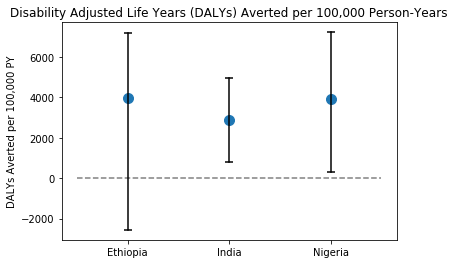

In [23]:
make_dot_plots(overall_results, 'dalys')

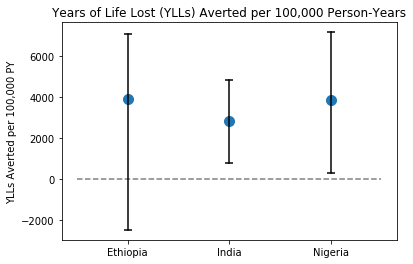

In [24]:
make_dot_plots(overall_results, 'ylls')

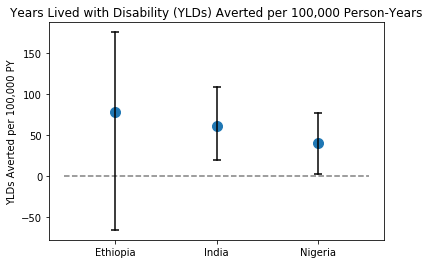

In [25]:
make_dot_plots(overall_results, 'ylds')

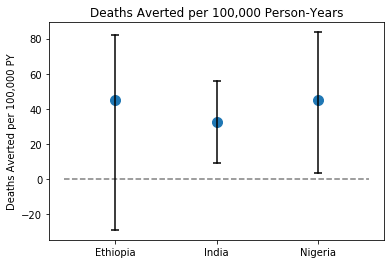

In [26]:
make_dot_plots(overall_results, 'deaths')